In [1]:
# импортирую библиотеки
import pandas as pd


In [2]:
# считываю данные пользователей

user_info = pd.read_sql(
    """SELECT * FROM public.user_data""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

user_info.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [3]:
### считытываю данные по постам

posts_info = pd.read_sql(
    """SELECT * FROM public.post_text_df""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

posts_info.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [4]:
# нужно узнать сколько записей содержит таблица feed_data, возможно их много

count_feed_data = pd.read_sql(
    """SELECT count(*) FROM public.feed_data""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

count_feed_data.head()

,count
0,76892800


In [5]:
# т.к. записей 76М, будем забирать только 5М

feed_data = pd.read_sql(
    """SELECT * FROM public.feed_data LIMIT 5000000""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-11-11 17:07:36,142366,470,view,1
1,2021-11-11 17:10:09,142366,470,like,0
2,2021-11-11 17:10:11,142366,1747,view,0
3,2021-11-11 17:12:54,142366,1773,view,0
4,2021-11-11 17:13:34,142366,3055,view,0


In [6]:
# есть ли пропуски в таблицах?

posts_info.isna().sum().sum(), user_info.isna().sum().sum(), feed_data.isna().sum().sum()

(0, 0, 0)

In [7]:
user_info.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


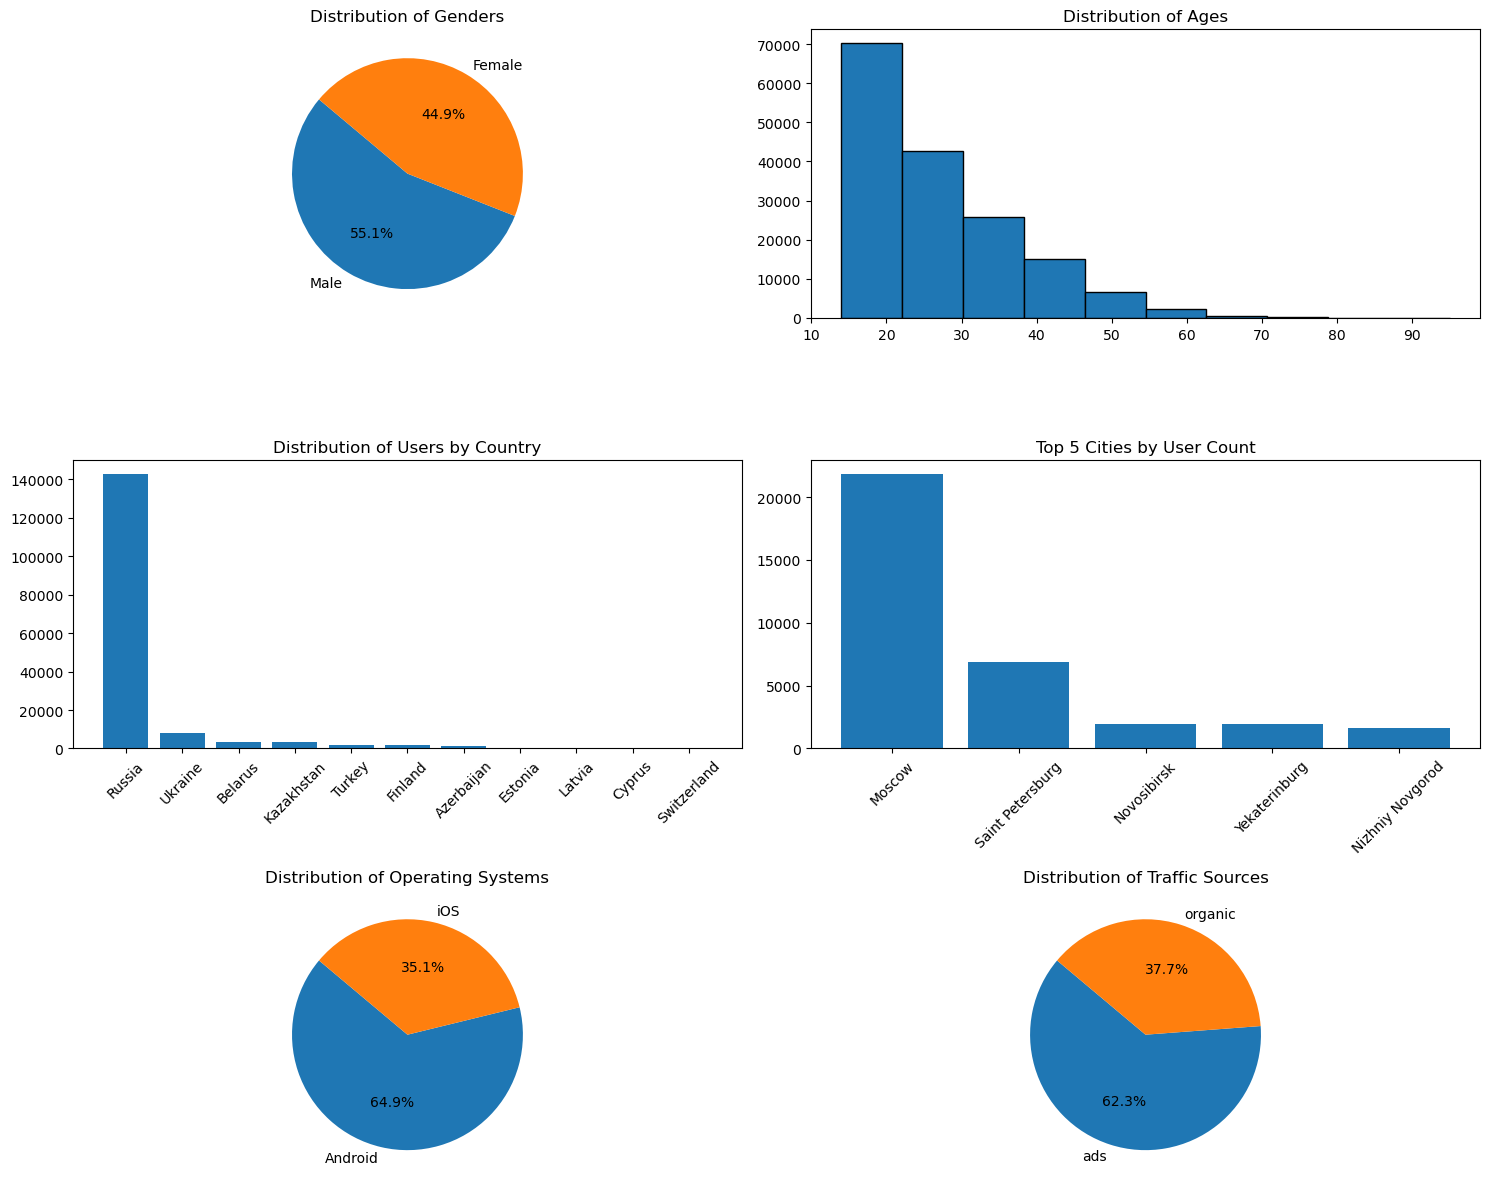

In [8]:
import matplotlib.pyplot as plt
# визуализируем данные по user_info
# Создание полотна
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# График 1: Распределение полов
gender_counts = user_info['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Distribution of Genders')

# График 2: Распределение возрастов
axes[0, 1].hist(user_info['age'], bins=10, edgecolor='black')
axes[0, 1].set_title('Distribution of Ages')

# График 3: Распределение пользователей по странам
country_counts = user_info['country'].value_counts()
axes[1, 0].bar(country_counts.index, country_counts.values)
axes[1, 0].set_title('Distribution of Users by Country')
axes[1, 0].tick_params(axis='x', rotation=45)

# График 4: Распределение пользователей по городам (выводим только топ-5 городов)
city_counts = user_info['city'].value_counts().head()
axes[1, 1].bar(city_counts.index, city_counts.values)
axes[1, 1].set_title('Top 5 Cities by User Count')
axes[1, 1].tick_params(axis='x', rotation=45)


# График 6: Распределение операционных систем
os_counts = user_info['os'].value_counts()
axes[2, 0].pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=140)
axes[2, 0].set_title('Distribution of Operating Systems')

# График 7: Распределение источников трафика
source_counts = user_info['source'].value_counts()
axes[2, 1].pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140)
axes[2, 1].set_title('Distribution of Traffic Sources')

plt.tight_layout()
plt.show()

In [9]:
feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-11-11 17:07:36,142366,470,view,1
1,2021-11-11 17:10:09,142366,470,like,0
2,2021-11-11 17:10:11,142366,1747,view,0
3,2021-11-11 17:12:54,142366,1773,view,0
4,2021-11-11 17:13:34,142366,3055,view,0


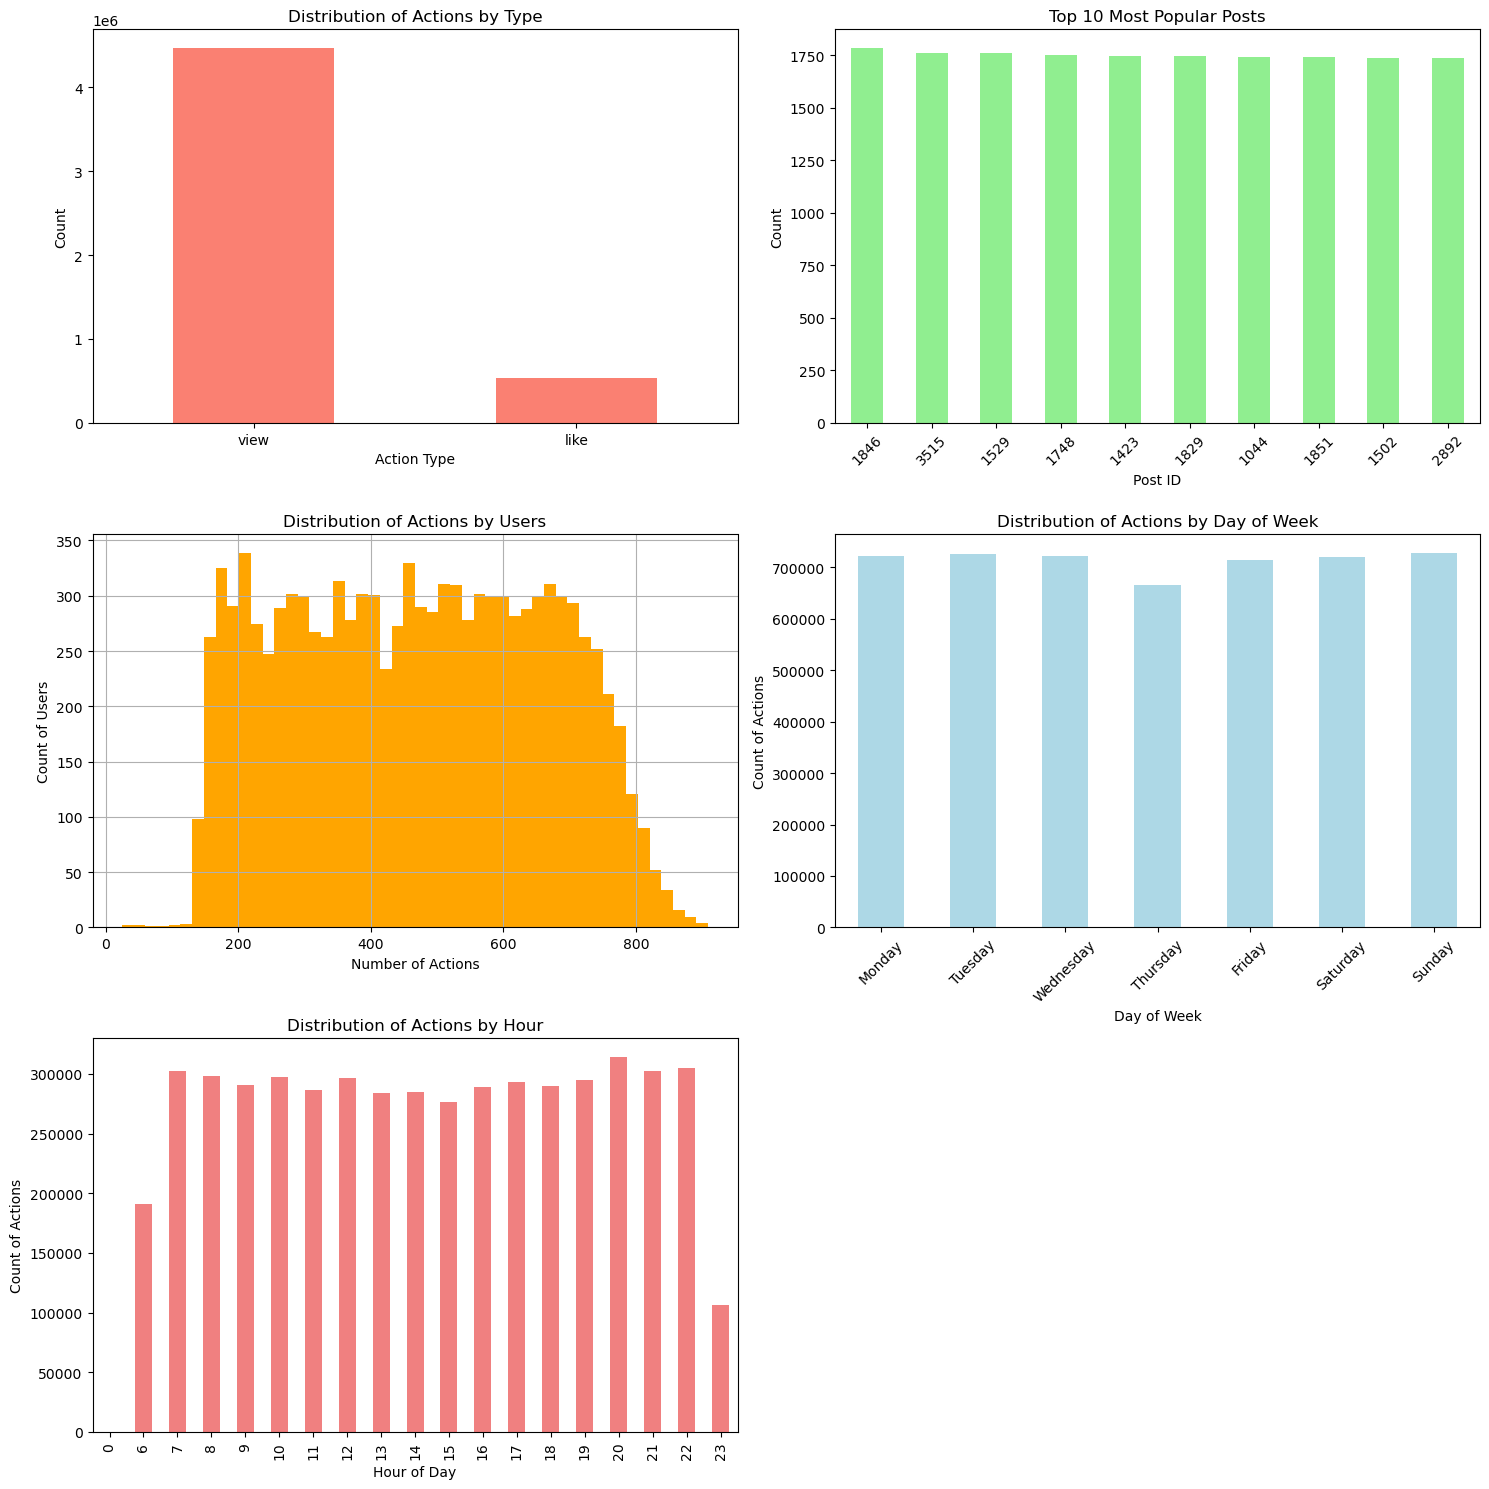

In [10]:
# визуализируем данные по feed_data
feed_data['timestamp'] = pd.to_datetime(feed_data['timestamp'])

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# График 1: Распределение действий по типу
feed_data['action'].value_counts().plot(kind='bar', color='salmon', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Actions by Type')
axes[0, 0].set_xlabel('Action Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)

# График 2: Топ-10 самых популярных постов
top_posts = feed_data['post_id'].value_counts().head(10)
top_posts.plot(kind='bar', color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Most Popular Posts')
axes[0, 1].set_xlabel('Post ID')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# График 3: Распределение действий по пользователям
feed_data['user_id'].value_counts().hist(bins=50, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Actions by Users')
axes[1, 0].set_xlabel('Number of Actions')
axes[1, 0].set_ylabel('Count of Users')

# График 4: Распределение действий по дням недели
feed_data['timestamp'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', color='lightblue', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Actions by Day of Week')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Count of Actions')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

# График 5: Распределение действий по часам
feed_data['timestamp'].dt.hour.value_counts().sort_index().plot(kind='bar', color='lightcoral', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Actions by Hour')
axes[2, 0].set_xlabel('Hour of Day')
axes[2, 0].set_ylabel('Count of Actions')

# Убрать последний пустой подграфик
fig.delaxes(axes[2, 1])

# Расположение графиков
plt.tight_layout()
plt.show()

In [11]:
### Почистим данные от action != view

feed_data = feed_data[feed_data.action=='view']

feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-11-11 17:07:36,142366,470,view,1
2,2021-11-11 17:10:11,142366,1747,view,0
3,2021-11-11 17:12:54,142366,1773,view,0
4,2021-11-11 17:13:34,142366,3055,view,0
5,2021-11-11 17:14:09,142366,776,view,0


In [12]:
import re
import string
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download("wordnet")
wnl = nltk.stem.WordNetLemmatizer()

def preprocessing(line, token=wnl):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    line = line.replace('\n\n', ' ').replace('\n', ' ')
    line = ' '.join([token.lemmatize(x) for x in line.split(' ')])
    return line


tfidf = TfidfVectorizer(
    stop_words='english',
    preprocessor=preprocessing
)

tfidf

[nltk_data] Downloading package wordnet to /Users/ivan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TfidfVectorizer(preprocessor=<function preprocessing at 0x2c0051900>,
                stop_words='english')

In [13]:
tfidf_data = (
    tfidf
    .fit_transform(posts_info['text'])
    .toarray()
)

tfidf_data = pd.DataFrame(
    tfidf_data,
    index=posts_info.post_id,
    columns=tfidf.get_feature_names_out()
)

### Генерим фичи на основе TfIdf

posts_info['TotalTfIdf'] = tfidf_data.sum(axis=1).reset_index()[0]
posts_info['MaxTfIdf'] = tfidf_data.max(axis=1).reset_index()[0]
posts_info['MeanTfIdf'] = tfidf_data.mean(axis=1).reset_index()[0]

### Пытаемся кластеризовать тексты

from sklearn.decomposition import PCA

centered = tfidf_data - tfidf_data.mean()

pca = PCA(n_components=20)
pca_decomp = pca.fit_transform(centered)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15, random_state=0).fit(pca_decomp)

posts_info['TextCluster'] = kmeans.labels_

dists_columns = ['DistanceTo1thCluster',
                 'DistanceTo2thCluster',
                 'DistanceTo3thCluster',
                 'DistanceTo4thCluster',
                 'DistanceTo5thCluster',
                 'DistanceTo6thCluster',
                 'DistanceTo7thCluster',
                 'DistanceTo8thCluster',
                 'DistanceTo9thCluster',
                 'DistanceTo10thCluster',
                 'DistanceTo11thCluster',
                 'DistanceTo12thCluster',
                 'DistanceTo13thCluster',
                 'DistanceTo14thCluster',
                 'DistanceTo15thCluster']

dists_df = pd.DataFrame(
    data=kmeans.transform(pca_decomp),
    columns=dists_columns
)

dists_df.head()

/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,DistanceTo1thCluster,DistanceTo2thCluster,DistanceTo3thCluster,DistanceTo4thCluster,DistanceTo5thCluster,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,0.532901,0.436084,0.147172,0.448518,0.507275,0.525893,0.530723,0.438979,0.500329,0.387353,0.550175,0.478806,0.466725,0.451345,0.447801
1,0.433108,0.285707,0.255451,0.309872,0.384028,0.414573,0.275347,0.277382,0.428396,0.165792,0.454834,0.345186,0.342283,0.294835,0.280426
2,0.449670,0.309370,0.120120,0.333565,0.397835,0.433374,0.478700,0.316396,0.433037,0.233200,0.486276,0.364818,0.350265,0.341828,0.329818
3,0.414241,0.255089,0.218658,0.271606,0.360407,0.385589,0.428902,0.275066,0.406292,0.143141,0.449751,0.322376,0.309626,0.281130,0.280003
4,0.407131,0.167051,0.283616,0.198522,0.305859,0.342584,0.392652,0.211795,0.352832,0.104986,0.410795,0.263048,0.249971,0.238230,0.198003


In [14]:
posts_info = pd.concat((posts_info,dists_df), axis=1)

posts_info.head()

,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,TextCluster,DistanceTo1thCluster,DistanceTo2thCluster,DistanceTo3thCluster,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.748129,0.495805,0.000190,2,0.532901,0.436084,0.147172,...,0.525893,0.530723,0.438979,0.500329,0.387353,0.550175,0.478806,0.466725,0.451345,0.447801
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,11.878472,0.308003,0.000258,9,0.433108,0.285707,0.255451,...,0.414573,0.275347,0.277382,0.428396,0.165792,0.454834,0.345186,0.342283,0.294835,0.280426
2,3,Asian quake hits European shares\n\nShares in ...,business,12.675530,0.261799,0.000276,2,0.449670,0.309370,0.120120,...,0.433374,0.478700,0.316396,0.433037,0.233200,0.486276,0.364818,0.350265,0.341828,0.329818
3,4,India power shares jump on debut\n\nShares in ...,business,6.622786,0.537713,0.000144,9,0.414241,0.255089,0.218658,...,0.385589,0.428902,0.275066,0.406292,0.143141,0.449751,0.322376,0.309626,0.281130,0.280003
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.352096,0.420251,0.000138,9,0.407131,0.167051,0.283616,...,0.342584,0.392652,0.211795,0.352832,0.104986,0.410795,0.263048,0.249971,0.238230,0.198003


In [15]:
### Воспроизведем датафрейм со всеми новыми фичами 

df = pd.merge(feed_data,
              posts_info,
              on='post_id',
              how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,2021-11-11 17:07:36,142366,470,view,1,Ryanair in $4bn Boeing plane deal\n\nBudget ai...,business,6.775509,0.553430,0.000147,...,0.368898,0.406611,0.213334,0.359522,0.114204,0.408712,0.282836,0.270393,0.263004,0.215364
1,2021-11-11 17:10:11,142366,1747,view,0,Ireland v USA (Sat)\n\nSaturday 20 November\n\...,sport,11.350430,0.273087,0.000247,...,0.383974,0.438468,0.205689,0.133426,0.241373,0.425914,0.313686,0.298400,0.333971,0.282589
2,2021-11-11 17:12:54,142366,1773,view,0,Hearts 2-1 Livingston\n\nHearts wrapped up the...,sport,10.210894,0.351073,0.000222,...,0.332255,0.407236,0.145263,0.272427,0.177254,0.396829,0.236862,0.195270,0.271788,0.232871
3,2021-11-11 17:13:34,142366,3055,view,0,#covid19 basic common sense https://t.co/BYqJq...,covid,2.221277,0.719162,0.000048,...,0.335782,0.494998,0.358143,0.454282,0.335118,0.495500,0.369970,0.359216,0.397656,0.380100
4,2021-11-11 17:14:09,142366,776,view,0,Paraguay novel wins US book prize\n\nA novel s...,entertainment,10.984280,0.281163,0.000239,...,0.406957,0.439841,0.261339,0.402933,0.249025,0.218706,0.307280,0.289469,0.320134,0.232984


In [16]:
df = pd.merge(df,
              user_info,
              on='user_id',
              how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster,gender,age,country,city,exp_group,os,source
0,2021-11-11 17:07:36,142366,470,view,1,Ryanair in $4bn Boeing plane deal\n\nBudget ai...,business,6.775509,0.553430,0.000147,...,0.270393,0.263004,0.215364,1,23,Russia,Mukhorshibir,4,Android,organic
1,2021-11-11 17:10:11,142366,1747,view,0,Ireland v USA (Sat)\n\nSaturday 20 November\n\...,sport,11.350430,0.273087,0.000247,...,0.298400,0.333971,0.282589,1,23,Russia,Mukhorshibir,4,Android,organic
2,2021-11-11 17:12:54,142366,1773,view,0,Hearts 2-1 Livingston\n\nHearts wrapped up the...,sport,10.210894,0.351073,0.000222,...,0.195270,0.271788,0.232871,1,23,Russia,Mukhorshibir,4,Android,organic
3,2021-11-11 17:13:34,142366,3055,view,0,#covid19 basic common sense https://t.co/BYqJq...,covid,2.221277,0.719162,0.000048,...,0.359216,0.397656,0.380100,1,23,Russia,Mukhorshibir,4,Android,organic
4,2021-11-11 17:14:09,142366,776,view,0,Paraguay novel wins US book prize\n\nA novel s...,entertainment,10.984280,0.281163,0.000239,...,0.289469,0.320134,0.232984,1,23,Russia,Mukhorshibir,4,Android,organic


In [17]:
### выделим признаки из timestamp

df['hour'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.hour)
df['month'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.month)

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo15thCluster,gender,age,country,city,exp_group,os,source,hour,month
0,2021-11-11 17:07:36,142366,470,view,1,Ryanair in $4bn Boeing plane deal\n\nBudget ai...,business,6.775509,0.553430,0.000147,...,0.215364,1,23,Russia,Mukhorshibir,4,Android,organic,17,11
1,2021-11-11 17:10:11,142366,1747,view,0,Ireland v USA (Sat)\n\nSaturday 20 November\n\...,sport,11.350430,0.273087,0.000247,...,0.282589,1,23,Russia,Mukhorshibir,4,Android,organic,17,11
2,2021-11-11 17:12:54,142366,1773,view,0,Hearts 2-1 Livingston\n\nHearts wrapped up the...,sport,10.210894,0.351073,0.000222,...,0.232871,1,23,Russia,Mukhorshibir,4,Android,organic,17,11
3,2021-11-11 17:13:34,142366,3055,view,0,#covid19 basic common sense https://t.co/BYqJq...,covid,2.221277,0.719162,0.000048,...,0.380100,1,23,Russia,Mukhorshibir,4,Android,organic,17,11
4,2021-11-11 17:14:09,142366,776,view,0,Paraguay novel wins US book prize\n\nA novel s...,entertainment,10.984280,0.281163,0.000239,...,0.232984,1,23,Russia,Mukhorshibir,4,Android,organic,17,11


In [18]:
### Уберем все ненужные колонки

df = df.drop([
    'action',
    'text',
],
    axis=1)

df = df.set_index(['user_id', 'post_id'])

df.head()

timestamp  target          topic  TotalTfIdf  \
user_id post_id                                                          
142366  470     2021-11-11 17:07:36       1       business    6.775509   
        1747    2021-11-11 17:10:11       0          sport   11.350430   
        1773    2021-11-11 17:12:54       0          sport   10.210894   
        3055    2021-11-11 17:13:34       0          covid    2.221277   
        776     2021-11-11 17:14:09       0  entertainment   10.984280   

                 MaxTfIdf  MeanTfIdf  TextCluster  DistanceTo1thCluster  \
user_id post_id                                                           
142366  470      0.553430   0.000147            9              0.408780   
        1747     0.273087   0.000247            8              0.457536   
        1773     0.351073   0.000222            1              0.418676   
        3055     0.719162   0.000048            3              0.512841   
        776      0.281163   0.000239           10              0.446956   

                 DistanceTo2thCluster  DistanceTo3thCluster  ...  \
user_id post_id                                              ...   
142366  470                  0.203405              0.197654  ...   
        1747                 0.233649              0.349515  ...   
        1773                 0.124074              0.311756  ...   
        3055                 0.310459              0.430308  ...   
        776                  0.239080              0.343727  ...   

                 DistanceTo15thCluster  gender  age  country          city  \
user_id post_id                                                              
142366  470                   0.215364       1   23   Russia  Mukhorshibir   
        1747                  0.282589       1   23   Russia  Mukhorshibir   
        1773                  0.232871       1   23   Russia  Mukhorshibir   
        3055                  0.380100       1   23   Russia  Mukhorshibir   
        776                   0.232984       1   23   Russia  Mukhorshibir   

                 exp_group       os   source  hour  month  
user_id post_id                                            
142366  470              4  Android  organic    17     11  
        1747             4  Android  organic    17     11  
        1773             4  Android  organic    17     11  
        3055             4  Android  organic    17     11  
        776              4  Android  organic    17     11  

[5 rows x 31 columns]

In [19]:
max(df.timestamp), min(df.timestamp)

(Timestamp('2021-12-29 23:43:15'), Timestamp('2021-10-01 06:01:40'))

In [20]:
### разобьем на train и test по времени, так как данные имеют временную структуру
### За отсечку возьмем 2021-12-15

df_train = df[df.timestamp < '2021-12-15']
df_test = df[df.timestamp >= '2021-12-15']

df_train = df_train.drop('timestamp', axis=1)
df_test = df_test.drop('timestamp', axis=1)

X_train = df_train.drop('target', axis=1)
X_test = df_test.drop('target', axis=1)

y_train = df_train['target']
y_test = df_test['target']

y_train.shape, y_test.shape


((3736608,), (728709,))

In [21]:
X_train

topic  TotalTfIdf  MaxTfIdf  MeanTfIdf  TextCluster  \
user_id post_id                                                                
142366  470           business    6.775509  0.553430   0.000147            9   
        1747             sport   11.350430  0.273087   0.000247            8   
        1773             sport   10.210894  0.351073   0.000222            1   
        3055             covid    2.221277  0.719162   0.000048            3   
        776      entertainment   10.984280  0.281163   0.000239           10   
...                        ...         ...       ...        ...          ...   
155660  1672             sport    8.201275  0.440454   0.000178            8   
        6384             movie   13.602927  0.238177   0.000296           12   
        4459             movie    7.581844  0.323658   0.000165            1   
        2308              tech    7.065720  0.591104   0.000154           13   
        6051             movie    6.928660  0.236891   0.000151            4   

                 DistanceTo1thCluster  DistanceTo2thCluster  \
user_id post_id                                               
142366  470                  0.408780              0.203405   
        1747                 0.457536              0.233649   
        1773                 0.418676              0.124074   
        3055                 0.512841              0.310459   
        776                  0.446956              0.239080   
...                               ...                   ...   
155660  1672                 0.527659              0.344050   
        6384                 0.469638              0.192446   
        4459                 0.439660              0.108730   
        2308                 0.631300              0.484319   
        6051                 0.467527              0.187614   

                 DistanceTo3thCluster  DistanceTo4thCluster  \
user_id post_id                                               
142366  470                  0.197654              0.239180   
        1747                 0.349515              0.265832   
        1773                 0.311756              0.177860   
        3055                 0.430308              0.142152   
        776                  0.343727              0.298614   
...                               ...                   ...   
155660  1672                 0.445098              0.368617   
        6384                 0.389771              0.327325   
        4459                 0.358408              0.236517   
        2308                 0.558280              0.492662   
        6051                 0.401643              0.306648   

                 DistanceTo5thCluster  ...  DistanceTo15thCluster  gender  \
user_id post_id                        ...                                  
142366  470                  0.327640  ...               0.215364       1   
        1747                 0.351391  ...               0.282589       1   
        1773                 0.285846  ...               0.232871       1   
        3055                 0.403155  ...               0.380100       1   
        776                  0.351184  ...               0.232984       1   
...                               ...  ...                    ...     ...   
155660  1672                 0.432634  ...               0.378641       1   
        6384                 0.254409  ...               0.304326       1   
        4459                 0.257112  ...               0.266199       1   
        2308                 0.547506  ...               0.527198       1   
        6051                 0.107330  ...               0.317359       1   

                 age  country          city  exp_group       os   source  \
user_id post_id                                                            
142366  470       23   Russia  Mukhorshibir          4  Android  organic   
        1747      23   Russia  Mukhorshibir          4  Android  organic   
        1773      23   Russia  Mukhors

In [22]:
### Начнем с решающего дерева

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder

object_cols = [
    'topic', 'TextCluster', 'gender', 'country',
    'city', 'exp_group', 'hour', 'month',
    'os', 'source'
]

### применяем OHE для тех колонок, где уникальных значений <5
### применяем MTE для тех колонок, где уникальных значений >=5
cols_for_ohe = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]

### Cохраним индексы этих колонок

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]

t = [
    ('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
    ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx)
]

col_transform = ColumnTransformer(transformers=t)

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipe_dt = Pipeline([("column_transformer",
                     col_transform),
                     
                    ("decision_tree", 
                     DecisionTreeClassifier())])

pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [20, 28, 25, 26]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [0, 4, 22, 23, 24, 27])])),
                ('decision_tree', DecisionTreeClassifier())])

In [23]:
### Замерим качество работы такой модели на ROC-AUC

from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, pipe_dt.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, pipe_dt.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.9137867441706529
Качество на тесте: 0.5366634188752653


In [24]:
### Теперь обучим катбуст!

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100,
                              learning_rate=1,
                              depth=2,
                              allow_writing_files=False)

catboost.fit(X_train, y_train, object_cols)


0:	learn: 0.3560801	total: 587ms	remaining: 58.1s
1:	learn: 0.3491203	total: 1.05s	remaining: 51.5s
2:	learn: 0.3477875	total: 1.48s	remaining: 48s
3:	learn: 0.3470256	total: 1.82s	remaining: 43.8s
4:	learn: 0.3468566	total: 2.15s	remaining: 40.8s
5:	learn: 0.3467432	total: 2.43s	remaining: 38.1s
6:	learn: 0.3466927	total: 2.74s	remaining: 36.4s
7:	learn: 0.3464122	total: 3.03s	remaining: 34.9s
8:	learn: 0.3463540	total: 3.35s	remaining: 33.8s
9:	learn: 0.3457011	total: 3.64s	remaining: 32.8s
10:	learn: 0.3456685	total: 3.96s	remaining: 32s
11:	learn: 0.3456278	total: 4.32s	remaining: 31.7s
12:	learn: 0.3456049	total: 4.66s	remaining: 31.2s
13:	learn: 0.3455604	total: 5.01s	remaining: 30.8s
14:	learn: 0.3454842	total: 5.33s	remaining: 30.2s
15:	learn: 0.3454396	total: 5.64s	remaining: 29.6s
16:	learn: 0.3453180	total: 5.95s	remaining: 29s
17:	learn: 0.3452372	total: 6.25s	remaining: 28.5s
18:	learn: 0.3452170	total: 6.53s	remaining: 27.8s
19:	learn: 0.3451903	total: 6.82s	remaining: 27

In [25]:
### Замерим качество работы такой модели
### Возьмем ROC-AUC

print(f"Качество на трейне: {roc_auc_score(y_train, catboost.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.668259870687716
Качество на тесте: 0.6488999200832071


In [26]:
# Переберем параметры Catboost

from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(catboost, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train, cat_features=object_cols)

# Вывод наилучших параметров
print("Наилучшие параметры:", grid_search.best_params_)

# Вывод наилучшего значения метрики
print("Наилучшее значение метрики:", grid_search.best_score_)

0:	learn: 0.6853975	total: 387ms	remaining: 38.3s
1:	learn: 0.6776961	total: 735ms	remaining: 36s
2:	learn: 0.6701734	total: 988ms	remaining: 31.9s
3:	learn: 0.6628275	total: 1.25s	remaining: 30.1s
4:	learn: 0.6556378	total: 1.5s	remaining: 28.5s
5:	learn: 0.6486342	total: 1.76s	remaining: 27.6s
6:	learn: 0.6417950	total: 2.03s	remaining: 27s
7:	learn: 0.6351163	total: 2.26s	remaining: 26s
8:	learn: 0.6285956	total: 2.51s	remaining: 25.4s
9:	learn: 0.6222278	total: 2.75s	remaining: 24.8s
10:	learn: 0.6160118	total: 3s	remaining: 24.3s
11:	learn: 0.6099409	total: 3.26s	remaining: 23.9s
12:	learn: 0.6040135	total: 3.52s	remaining: 23.6s
13:	learn: 0.5982063	total: 3.78s	remaining: 23.2s
14:	learn: 0.5925584	total: 4.03s	remaining: 22.8s
15:	learn: 0.5870445	total: 4.3s	remaining: 22.6s
16:	learn: 0.5816602	total: 4.55s	remaining: 22.2s
17:	learn: 0.5764053	total: 4.81s	remaining: 21.9s
18:	learn: 0.5712548	total: 5.07s	remaining: 21.6s
19:	learn: 0.5662471	total: 5.33s	remaining: 21.3s
2

In [27]:
print(f"Качество на трейне: {roc_auc_score(y_train, grid_search.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7110583522419864
Качество на тесте: 0.6753349112009099
